In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import scipy

## Prediction Visualization

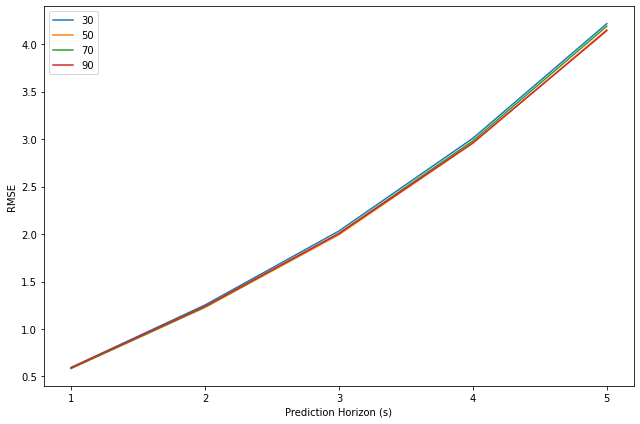

In [5]:
stat_dict = {
    '30': [0.594, 1.252, 2.032, 3.009, 4.217],
    '50': [0.583, 1.226, 1.993, 2.957, 4.153],
    '70': [0.585, 1.232, 2.007, 2.982, 4.190],
    '90': [0.591, 1.239, 2.005, 2.961, 4.143] 
}
stat_frame = pd.DataFrame(stat_dict).round(4)

x_labels = [str(i) for i in range(1, 6)]
x = np.arange(len(x_labels))

plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(9, 6))

#ax.set_title('模型在多事件句子中的表现')
ax.set_xlabel('Prediction Horizon (s)')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(['1', '2', '3', '4', '5'])
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.set_ylabel('RMSE')

markers = ['o', '*', 'v', 'X', 's']
#linestyles = ['dashdot', 'dashed', 'dotted', 'solid']
# default_cycler = (cycler(marker=markers) + 
#                   cycler(linestyle=linestyles) +
#                   cycler(color=list('rgby')))
# ax.set_prop_cycle(default_cycler)
fmts = ['k*-', 'k+-', 'ko--', 'ks--', 'k^-.']
for i, (name, y_data) in enumerate(stat_dict.items()):
    # y_data = stat_frame[model_name]
    
    #ax.plot(y_data, fmts[i], label=name, lw='3', markersize=12)
    ax.plot(y_data, label=name)

ax.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig('en_metric_by_event_num_no_color.pdf', format='pdf')
plt.show()

C:\Users\kobe\.conda\envs\forltp\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\kobe\.conda\envs\forltp\lib\site-packages\ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


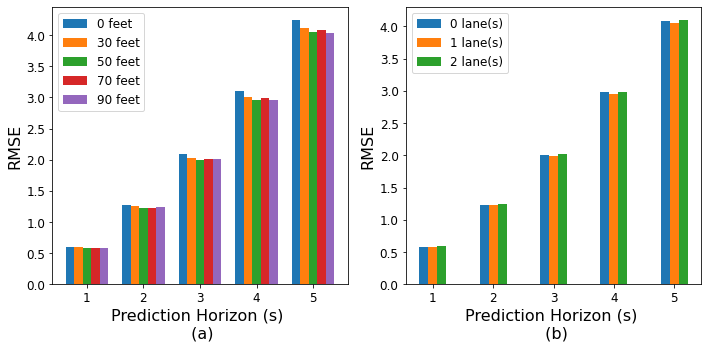

In [6]:
MEDIUM_SIZE = 12
BIGGER_SIZE = 12
LARGE_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

stat_dict = {
    '0': [0.602, 1.280, 2.089, 3.102, 4.242],
    '30': [0.594, 1.252, 2.032, 3.009, 4.112],
    '50': [0.583, 1.226, 1.993, 2.957, 4.05],
    '70': [0.585, 1.232, 2.007, 2.982, 4.08],
    '90': [0.591, 1.239, 2.005, 2.961, 4.04] 
}


x_labels = [str(i) for i in range(1, 6)]
x = np.arange(1, len(x_labels)+1)
width = 0.15

plt.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

rects0 = ax1.bar(x-2*width, stat_dict['0'], width, label='0 feet')
rects1 = ax1.bar(x-1*width, stat_dict['30'], width, label='30 feet')
rects2 = ax1.bar(x-0*width, stat_dict['50'], width, label='50 feet')
rects3 = ax1.bar(x+1*width, stat_dict['70'], width, label='70 feet')
rects4 = ax1.bar(x+2*width, stat_dict['90'], width, label='90 feet')
#ax.set_title('模型在多事件句子中的表现')
ax1.set_xlabel('Prediction Horizon (s) \n (a)')
ax1.set_xticks(x, x_labels)
ax1.set_ylabel('RMSE')
ax1.legend()

stat_dict = {
    '0': [0.586, 1.235, 2.008, 2.981, 4.09],
    '1': [0.583, 1.226, 1.993, 2.957, 4.05],
    '2': [0.592, 1.245, 2.020, 2.990, 4.10]
}
rects1 = ax2.bar(x-1*width, stat_dict['0'], width, label='0 lane(s)')
rects2 = ax2.bar(x-0*width, stat_dict['1'], width, label='1 lane(s)')
rects3 = ax2.bar(x+1*width, stat_dict['2'], width, label='2 lane(s)')

ax2.set_xlabel('Prediction Horizon (s) \n (b)')
ax2.set_xticks(x, x_labels)
ax2.set_ylabel('RMSE')
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('outputs/ablation_on_thresholds.pdf', format='pdf')
plt.show()

## Lane Change

In [9]:
tracks = np.load('tracks_change_lane.npy') # (N, T, C)
tracks.shape

(22, 41, 3)

In [10]:
# flatten_tracks = [np.concatenate((v_tracks, np.full((len(v_tracks), 1), i)), axis=-1).reshape(-1, v_tracks.shape[-1] + 1).tolist() \
#     for i, v_tracks in enumerate(tracks)]
flatten_tracks = [ track.tolist() + [i] for i, v_tracks in enumerate(tracks) for track in v_tracks] # v_tracks: (T, C), track: (C, )
flatten_tracks = np.array(flatten_tracks)
flatten_tracks = flatten_tracks[flatten_tracks[:, :2].sum(axis=-1) != 0] # remove the padding data.

In [11]:
data = pd.DataFrame(flatten_tracks, columns=['X', 'Y', 'Lane', 'Vehicle'])
data.head()

,X,Y,Lane,Vehicle
0,-7.433,-238.917969,1.0,0.0
1,-7.402,-223.620972,1.0,0.0
2,-7.372,-208.325012,1.0,0.0
3,-7.353,-193.026978,1.0,0.0
4,-7.337,-177.731995,1.0,0.0


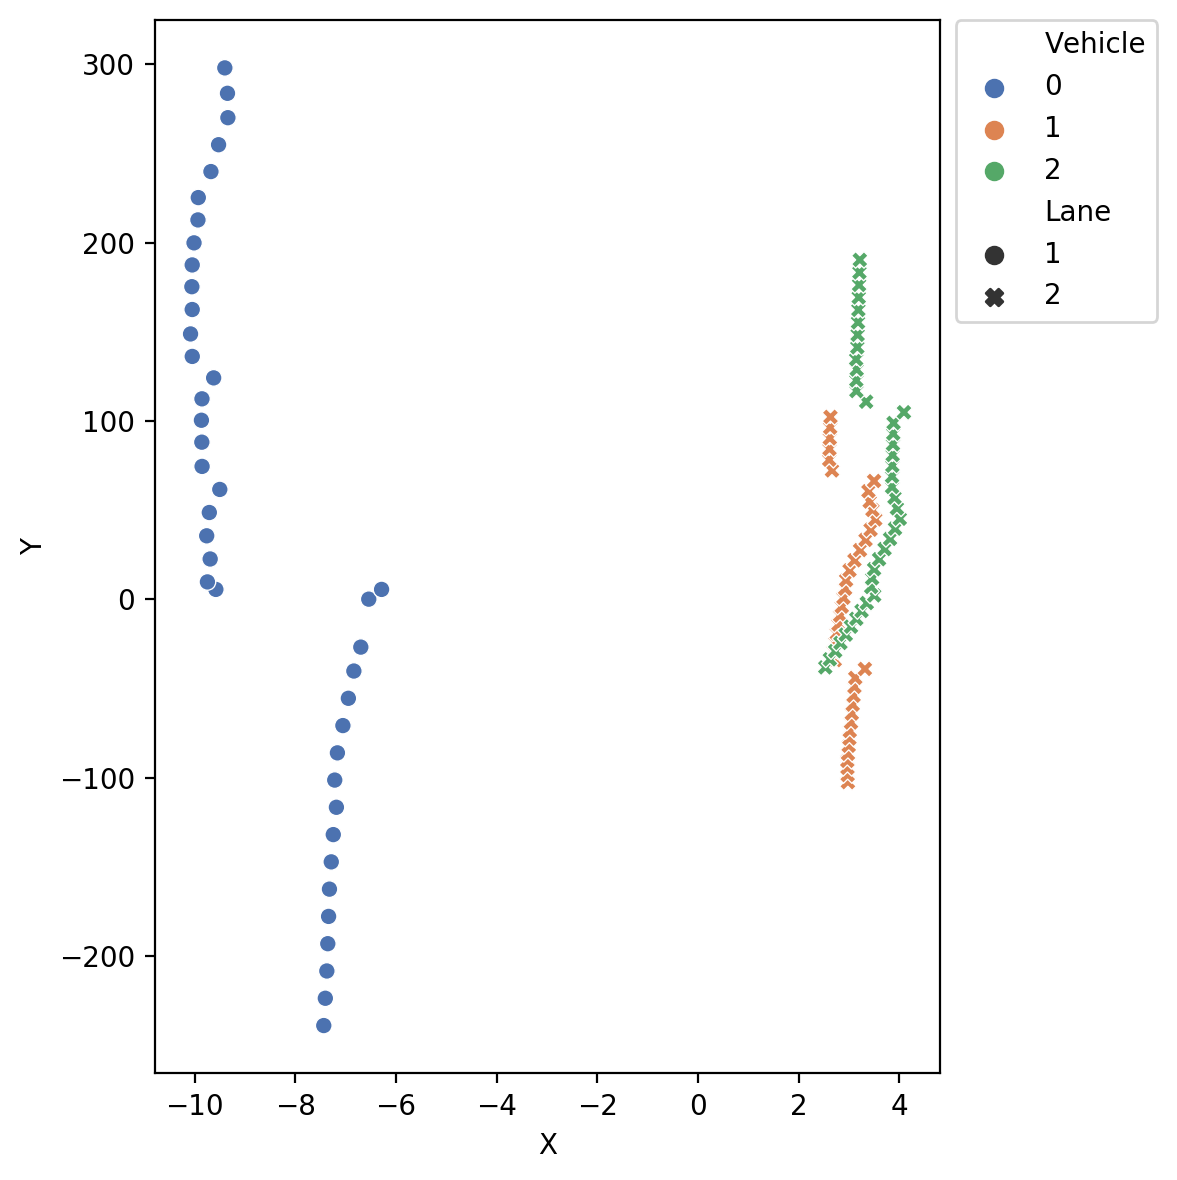

In [12]:
f, ax = plt.subplots(figsize=(6, 6), **{'dpi': 200})
data_dict = {'X': flatten_tracks[:, 0], 'Y': flatten_tracks[:, 1], 'Lane': flatten_tracks[:, 2].astype(int), 'Vehicle': flatten_tracks[:, -1].astype(int)}
sns.scatterplot(data=data_dict, x='X', y='Y', hue='Vehicle', style='Lane', palette='deep', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig('track_plot.pdf', format='pdf')
plt.show()

In [58]:
flatten_tracks[flatten_tracks[:, :2].sum(axis=-1) != 0].shape

(615, 4)

## Attention Analysis

In [2]:
attentions = np.load('attentions.npz') # (N, T, C)
attentions.files
slf_attn, spatial_attn = attentions['slf_attn'], attentions['spatial_attn']

In [9]:
(slf_attn.shape, spatial_attn.shape)

((4, 704, 16, 16), (4, 512, 22, 22))

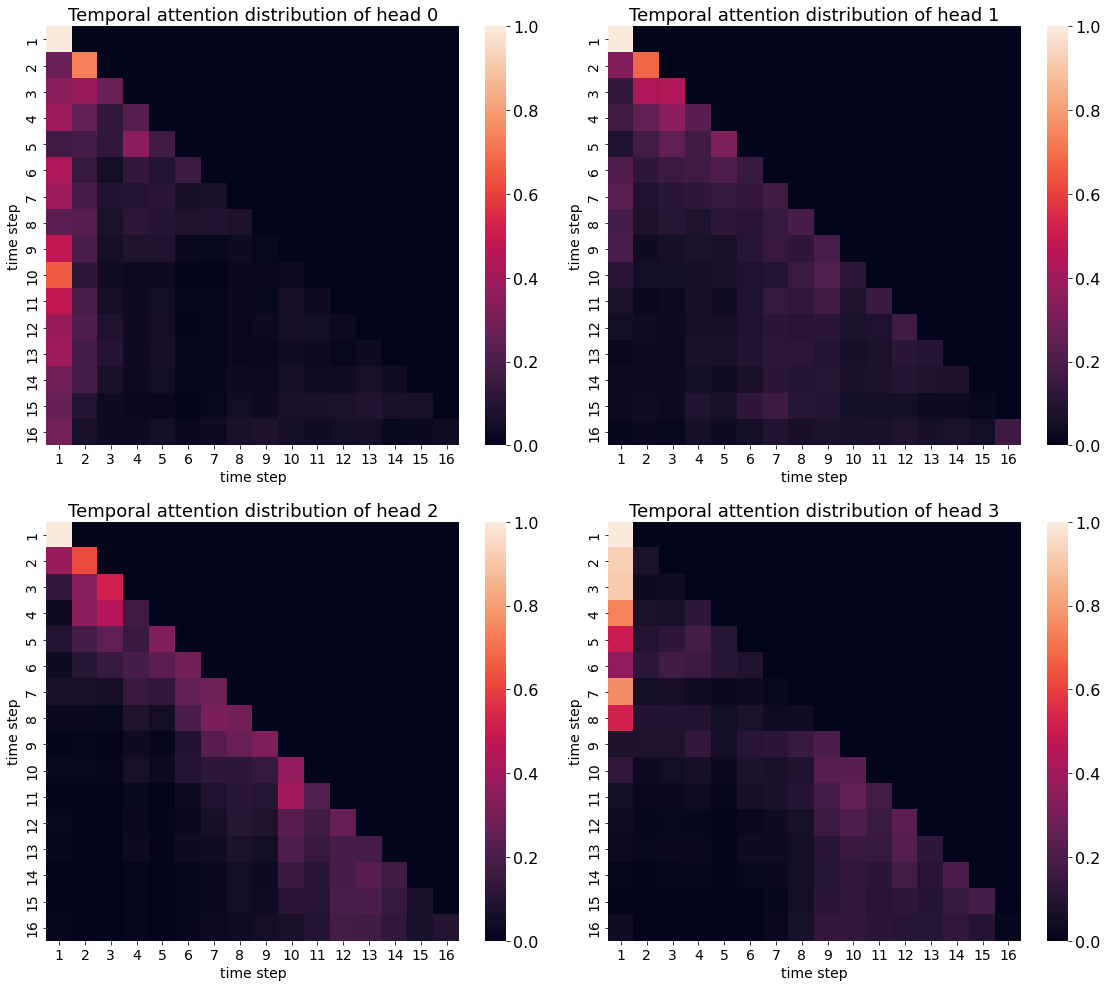

In [7]:
attention = slf_attn
cols = 2
rows = int(4/cols)
time_steps = attention.shape[-1]
time_steps = list(range(1, time_steps+1))
fig, axes = plt.subplots( rows,cols, figsize = (16,14))
axes = axes.flat
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# mask = np.zeros_like(attention[0,0])
# mask[np.triu_indices_from(mask)] = True
# print (f'Attention weights for token {tok[p_pos]}')
for i, att in enumerate(attention[:, 25]):
    #att = att.transpose()
    #im = axes[i].imshow(att, cmap='gray')
    sns.heatmap(att, vmin=0, vmax=1, ax=axes[i], xticklabels=time_steps, yticklabels=time_steps)
    axes[i].set_title(f'Temporal attention distribution of head {i}' )
    axes[i].set_ylabel('time step')
    axes[i].set_xlabel('time step')
plt.tight_layout()
plt.savefig('TemporalAttentionDistri.pdf')

In [4]:
spatial_attn = np.load('spatial_attention_distri.npy') # (n_heads, bs * t_h, n_objects, n_objects)
input_data = np.load('no_norm_input_data.npy') # (bs, input_size, t_h + t_f, n_objects)
coordinates = input_data[:, :2, :16, :].transpose(0, 2, 3, 1).reshape(-1, 22, 2) # (bs * t_h, n_objects, 2)
spatial_attn.shape, input_data.shape, coordinates.shape

((4, 512, 22, 22), (32, 4, 41, 22), (512, 22, 2))

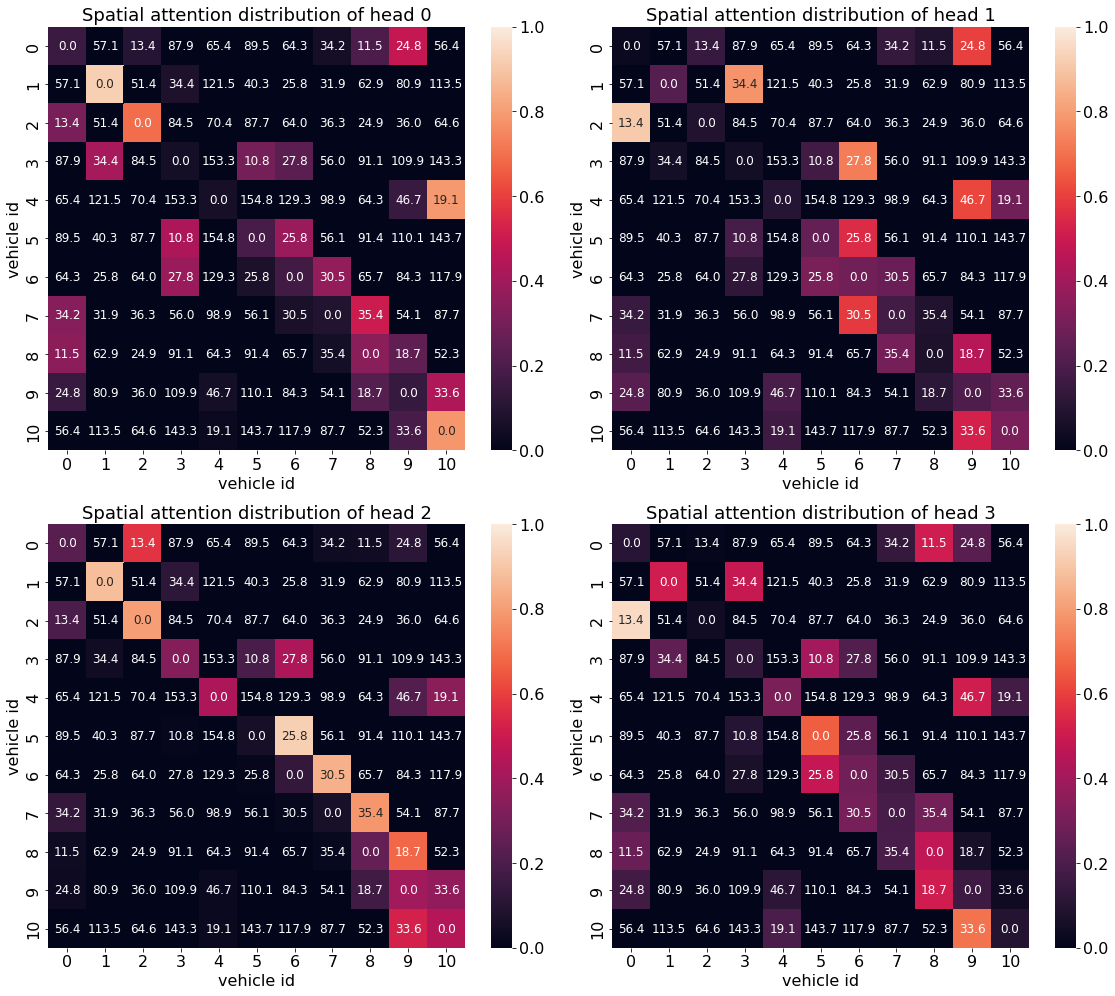

In [12]:
i = 15
valid_coords = coordinates[i]
valid_coords = valid_coords[valid_coords.sum(axis=-1) != 0]
distances = scipy.spatial.distance_matrix(valid_coords, valid_coords, p=2)
cols = 2
rows = int(4/cols)
num_objects = distances.shape[-1]
object_ids = list(range(num_objects))
fig, axes = plt.subplots( rows,cols, figsize = (16,14))
axes = axes.flat
plt.rc('font', size=12)          # controls default text sizes
for i, att in enumerate(spatial_attn[:, i]):
    #att = att.transpose()
    #im = axes[i].imshow(att, cmap='gray')
    
    att = att[:len(valid_coords), :len(valid_coords)]
    sns.heatmap(att, vmin=0, vmax=1, ax=axes[i], xticklabels=object_ids, yticklabels=object_ids, annot=distances, fmt='.1f')
    axes[i].set_title(f'Spatial attention distribution of head {i}' )
    axes[i].set_ylabel('vehicle id')
    axes[i].set_xlabel('vehicle id')

plt.tight_layout()
plt.savefig('SpatialAttentionDistri.pdf')